### Election Data Project - Polls and Donors

In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1.) Who was being polled and what was their party affiliation?
2.) Did the poll results favor Romney or Obama?
3.) How do undecided voters effect the poll?
4.) Can we account for the undecided voters?
5.) How did voter sentiment change over time?
6.) Can we see an effect in the polls from the debates?

In [1]:
import requests 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from io import StringIO

In [4]:
#url
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"


In [6]:
# Use requests to get the information in text form
source = requests.get(url).text

In [7]:
#Using StringIO to avoid an IO error with pandas
poll_data = StringIO(source)

In [8]:
# converting the data into dataframe
poll_df = pd.read_csv(poll_data)

In [9]:
# checking the review of the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [25]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [20]:
sns.set_style(style='whitegrid')

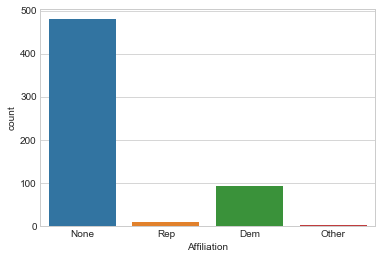

In [29]:
#Ploting Affiliation through countplot
sns.countplot('Affiliation',data=poll_df)

Looks like we are overall relatively neutral, but still leaning towards Democratic Affiliation, it will be good to keep this in mind. Let's see if sorting by the Population hue gives us any further insight into the data.

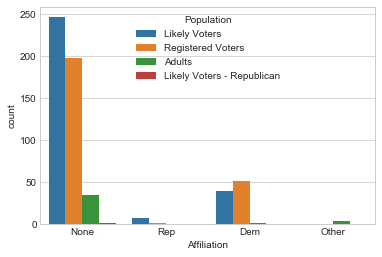

In [31]:
sns.countplot('Affiliation', hue='Population', data=poll_df)

Looks like we have a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled. Let's take another quick overview of the DataFrame.

In [32]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [10]:
#finding the mean of the data
avg = pd.DataFrame(poll_df.mean())

In [11]:
avg.head()

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [12]:
#removing the Number of Oberservations row
avg.drop(index='Number of Observations', axis=0, inplace=True)

In [13]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN


In [14]:
std = pd.DataFrame(poll_df.mean())

In [15]:
std.head()

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [16]:
#removing the row
std.drop(index='Number of Observations', inplace=True, axis=0)

In [17]:
std.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN


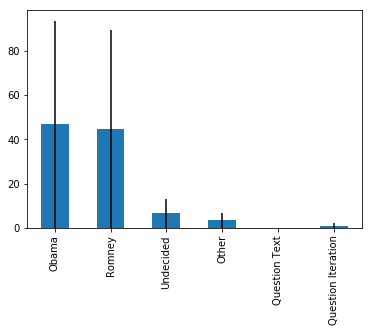

In [18]:
# ploting
avg.plot(yerr=std, kind='bar', legend=False)

In [19]:
poll_evg = pd.concat([avg, std], axis=1)

In [20]:
poll_evg.head()

,0,0
Obama,46.805461,46.805461
Romney,44.614334,44.614334
Undecided,6.550827,6.550827
Other,3.376238,3.376238
Question Text,NaN,NaN


In [21]:
poll_evg.columns= ['avg', 'std']

In [22]:
poll_evg.head()

,avg,std
Obama,46.805461,46.805461
Romney,44.614334,44.614334
Undecided,6.550827,6.550827
Other,3.376238,3.376238
Question Text,NaN,NaN


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


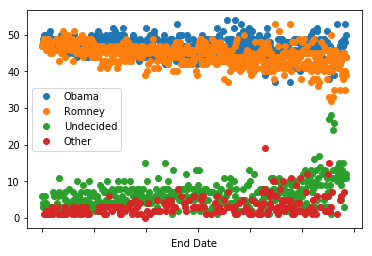

In [25]:
poll_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided', 'Other'], linestyle=" ", marker='o' )

In [28]:
poll_df['difference'] = (poll_df.Obama - poll_df.Romney) / 100

In [29]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [44]:
from datetime import datetime
from pandas import groupby
poll_df = poll_df.groupby('Start Date').mean()


AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [33]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1,0.00
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1,0.02
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1,0.00
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1,0.02
10,CNN,2012-11-02,2012-11-04,2012-11-04T20:16:09Z,693.0,Likely Voters,Live Phone,49.0,49.0,2.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://i2.cdn.turner.com/cnn/2012/images/11/04...,Nonpartisan,None,NaN,1,0.00
